# 情報計算科学の基礎 演習1


## 本日の内容

*   ガウスの消去法の復習
*   ガウスの消去法（ピボットなし）の実装
*   ガウスの消去法（ピボットなし）の実装（関数版）
*   ガウスの消去法（ピボットあり）の実装に向けて

## ガウスの消去法の復習　(講義資料より)

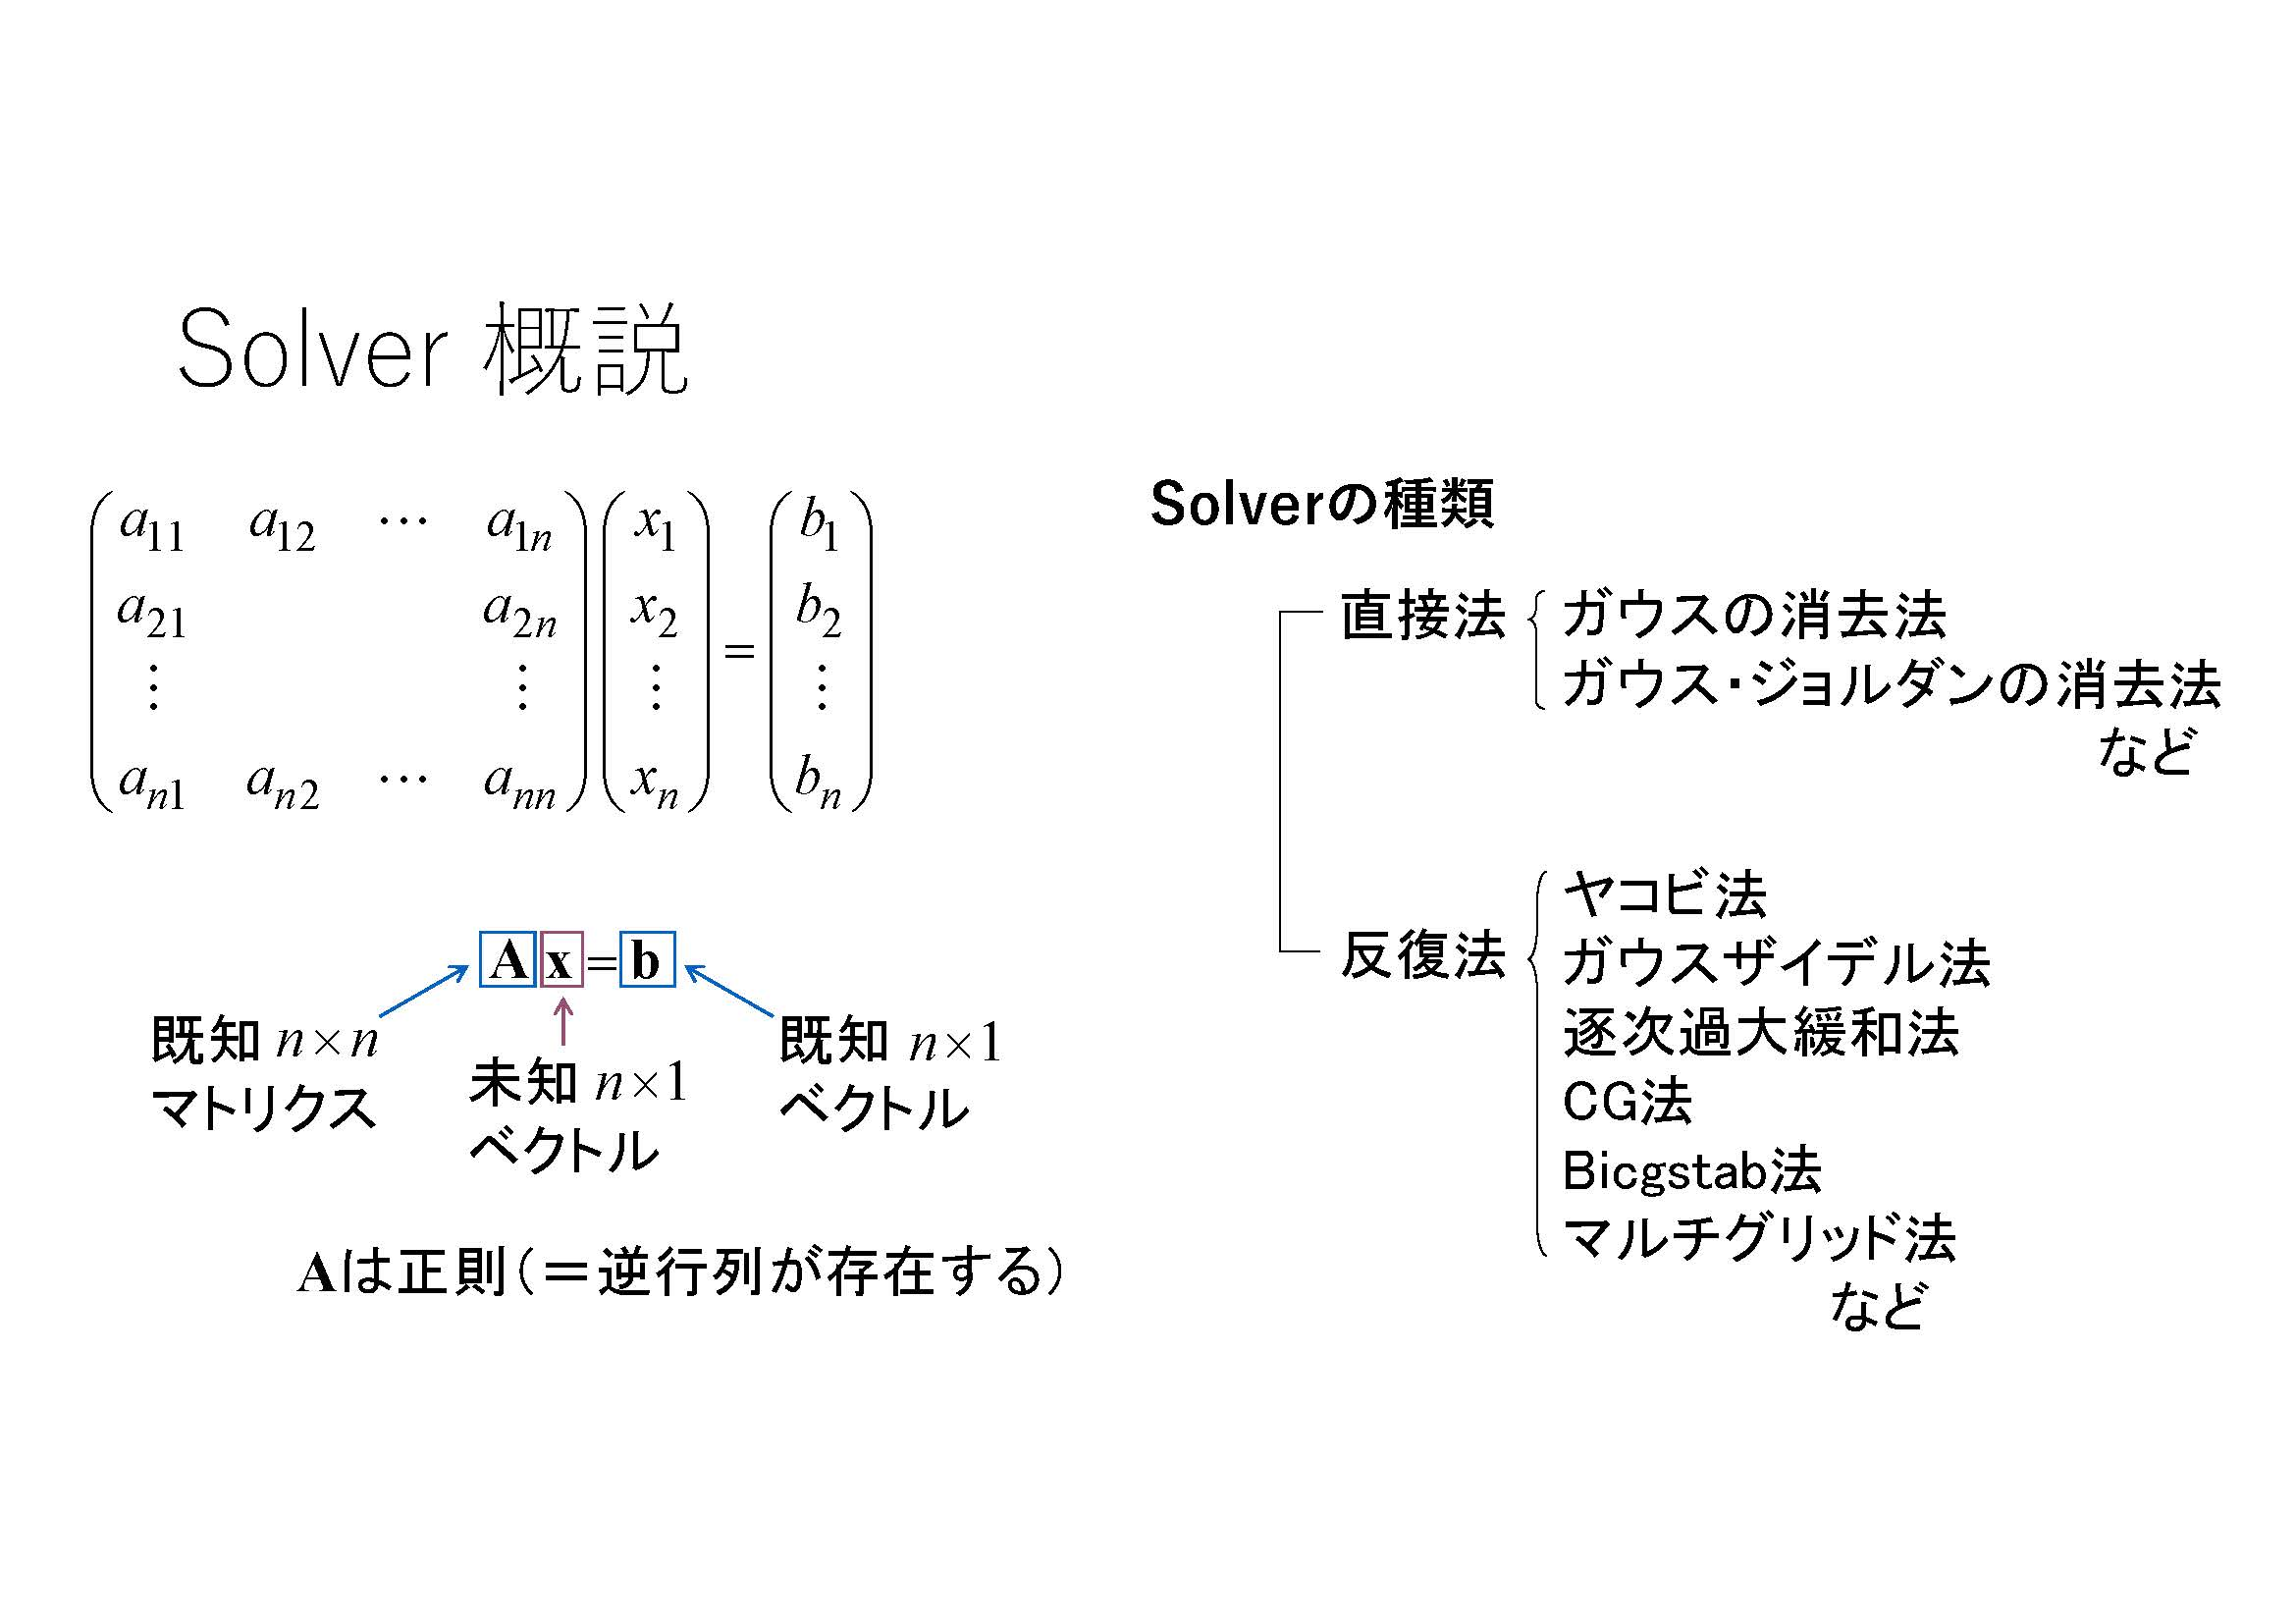


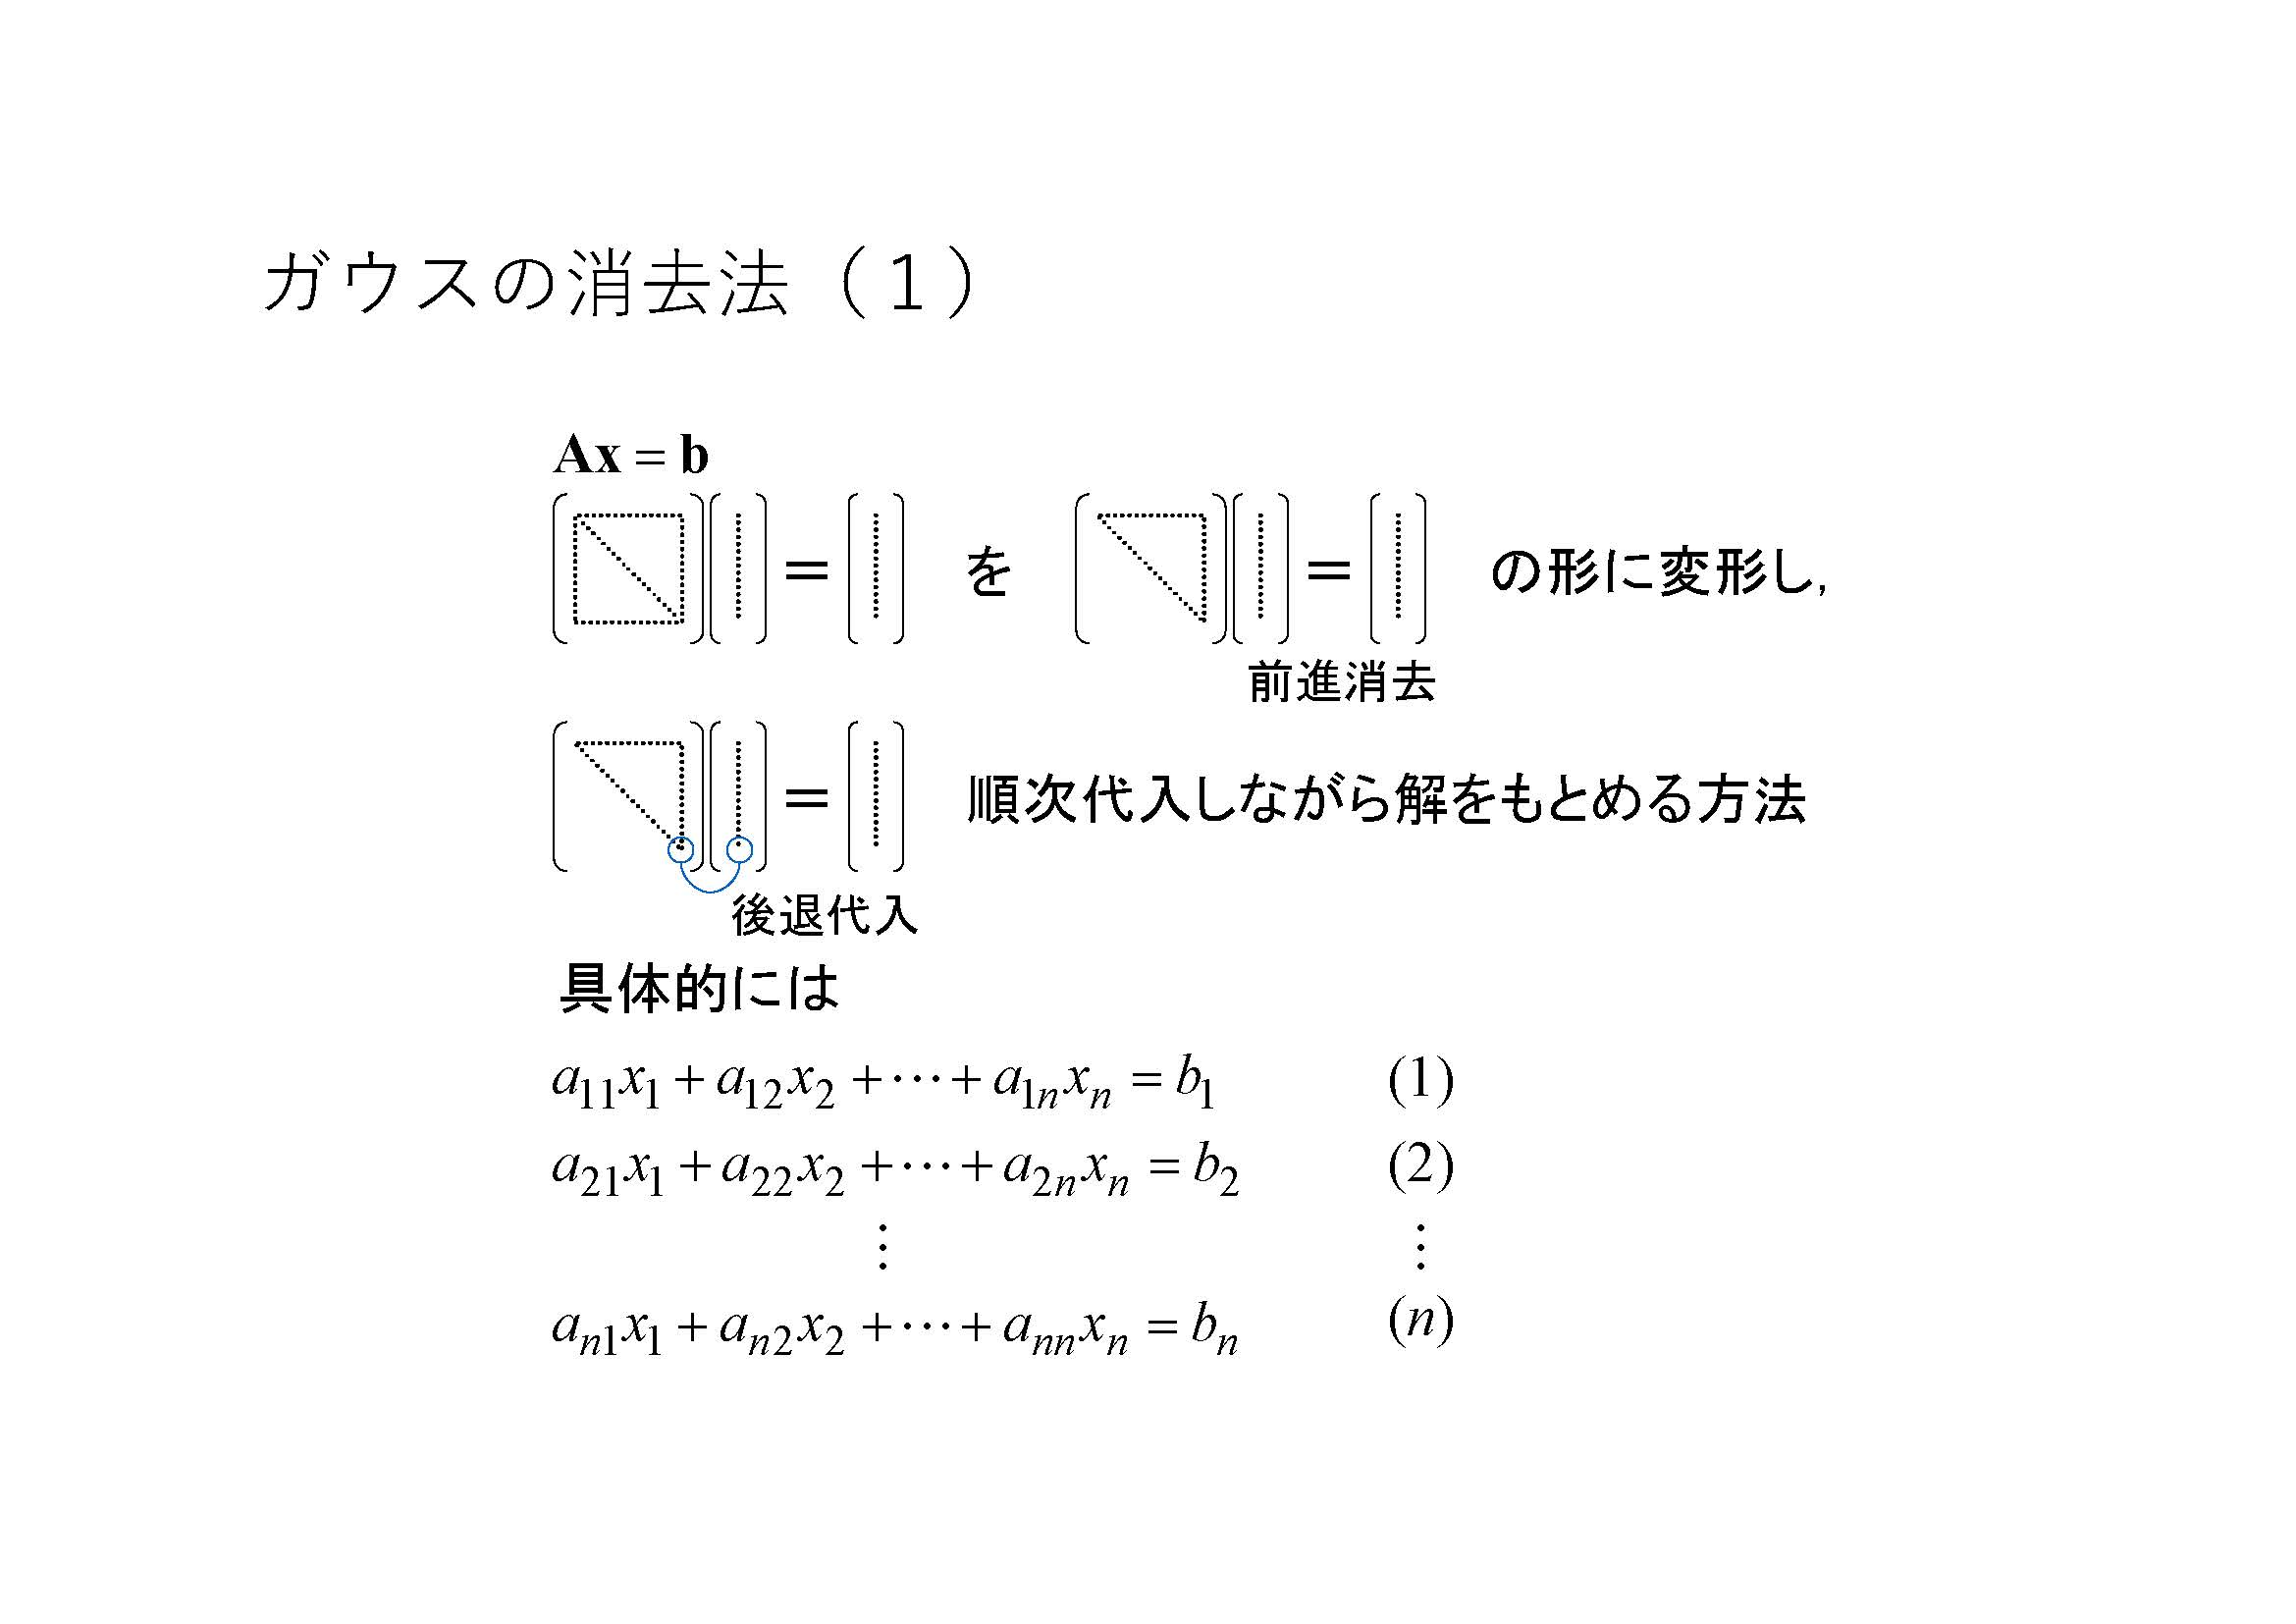

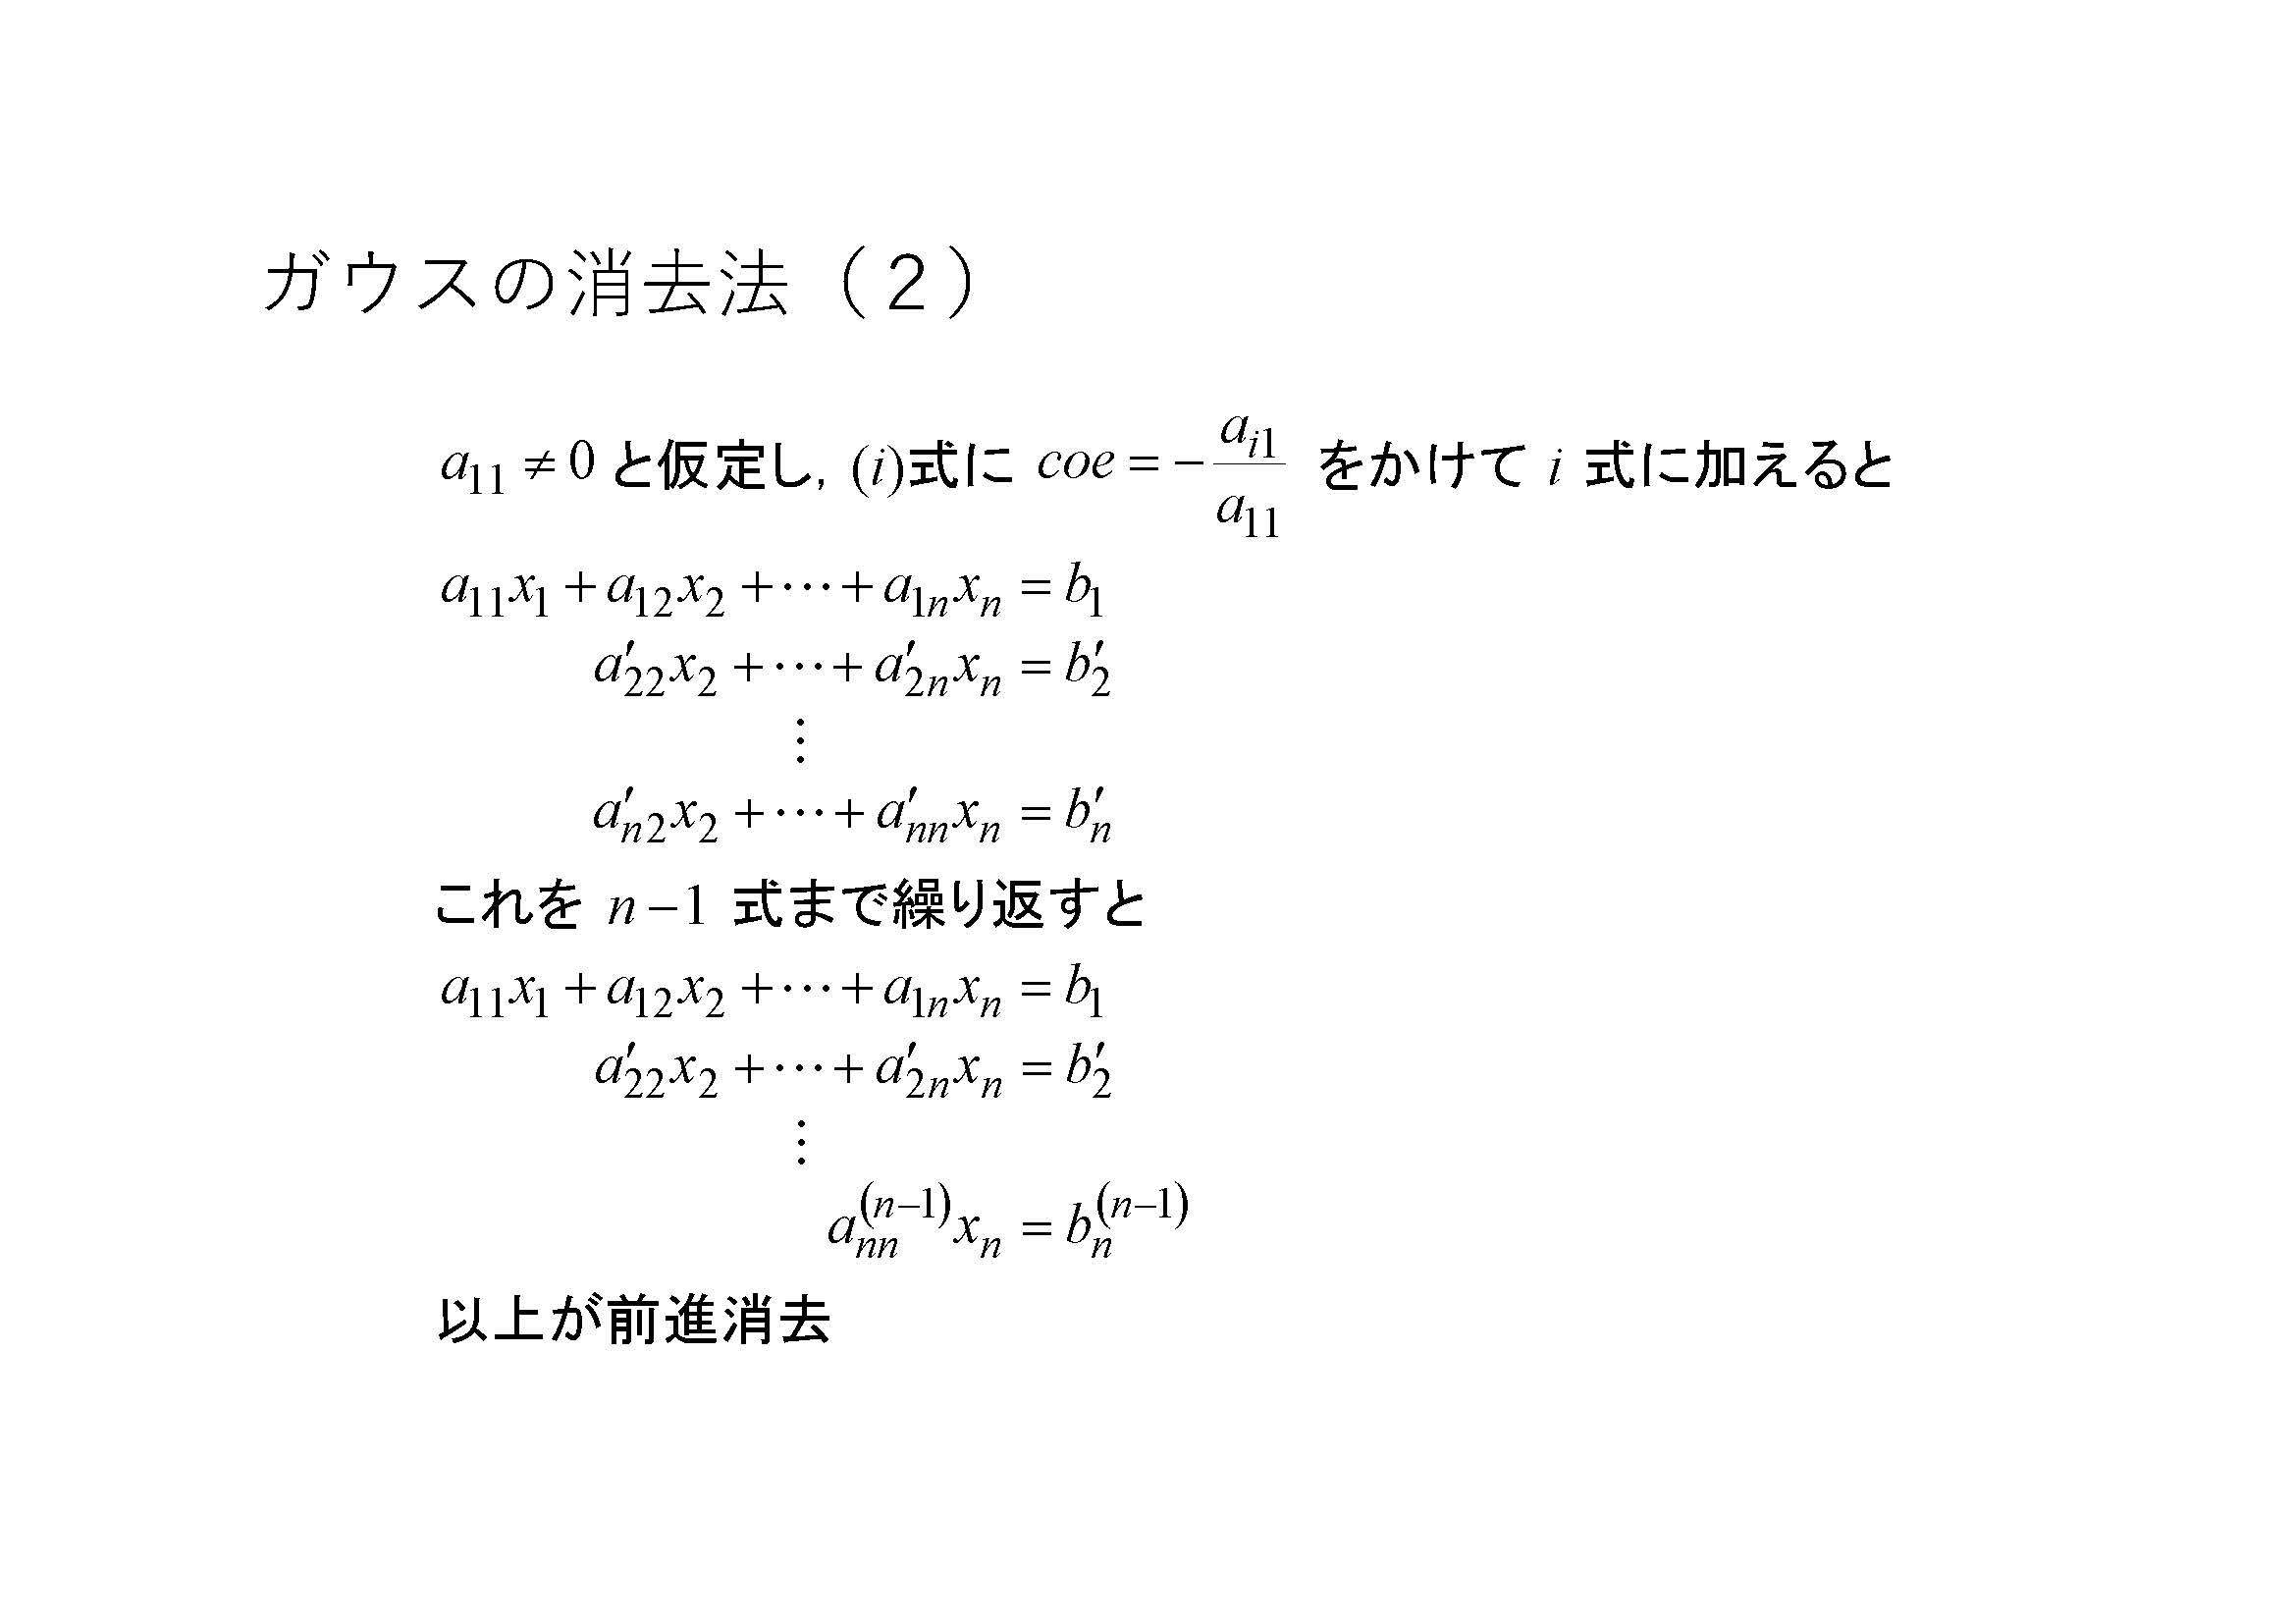

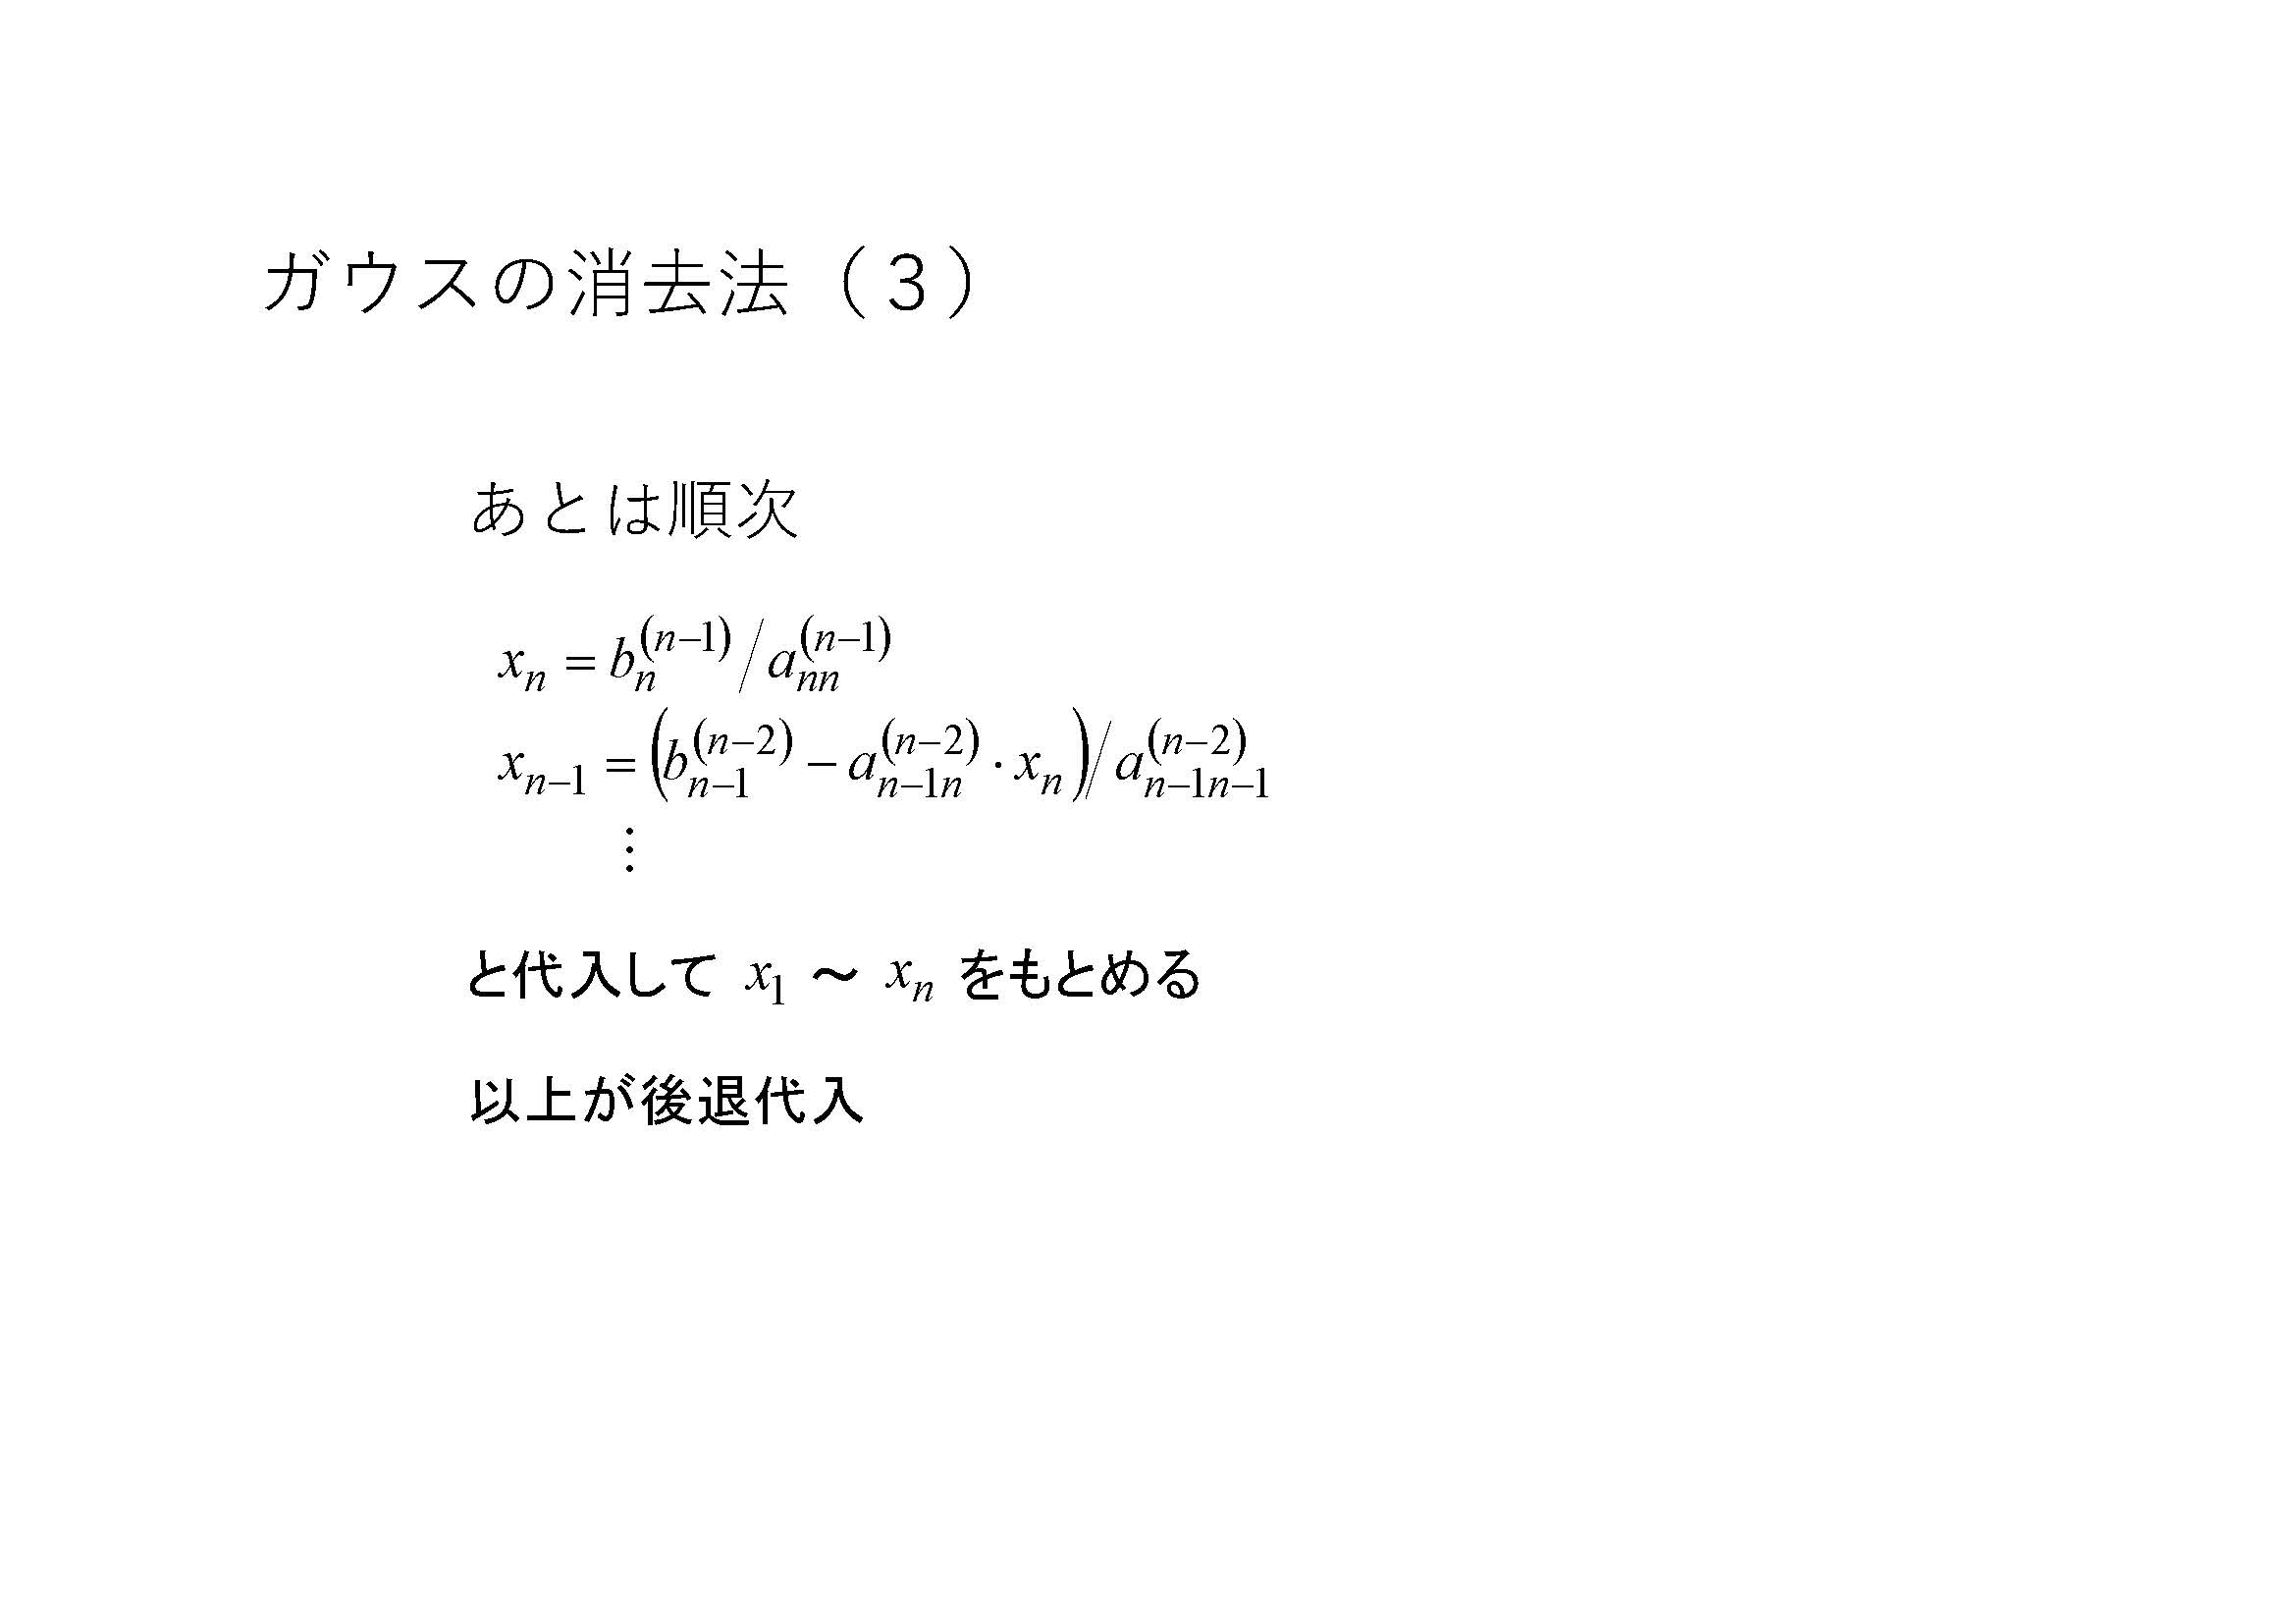

##ガウスの消去法（ピボットなし）の実装


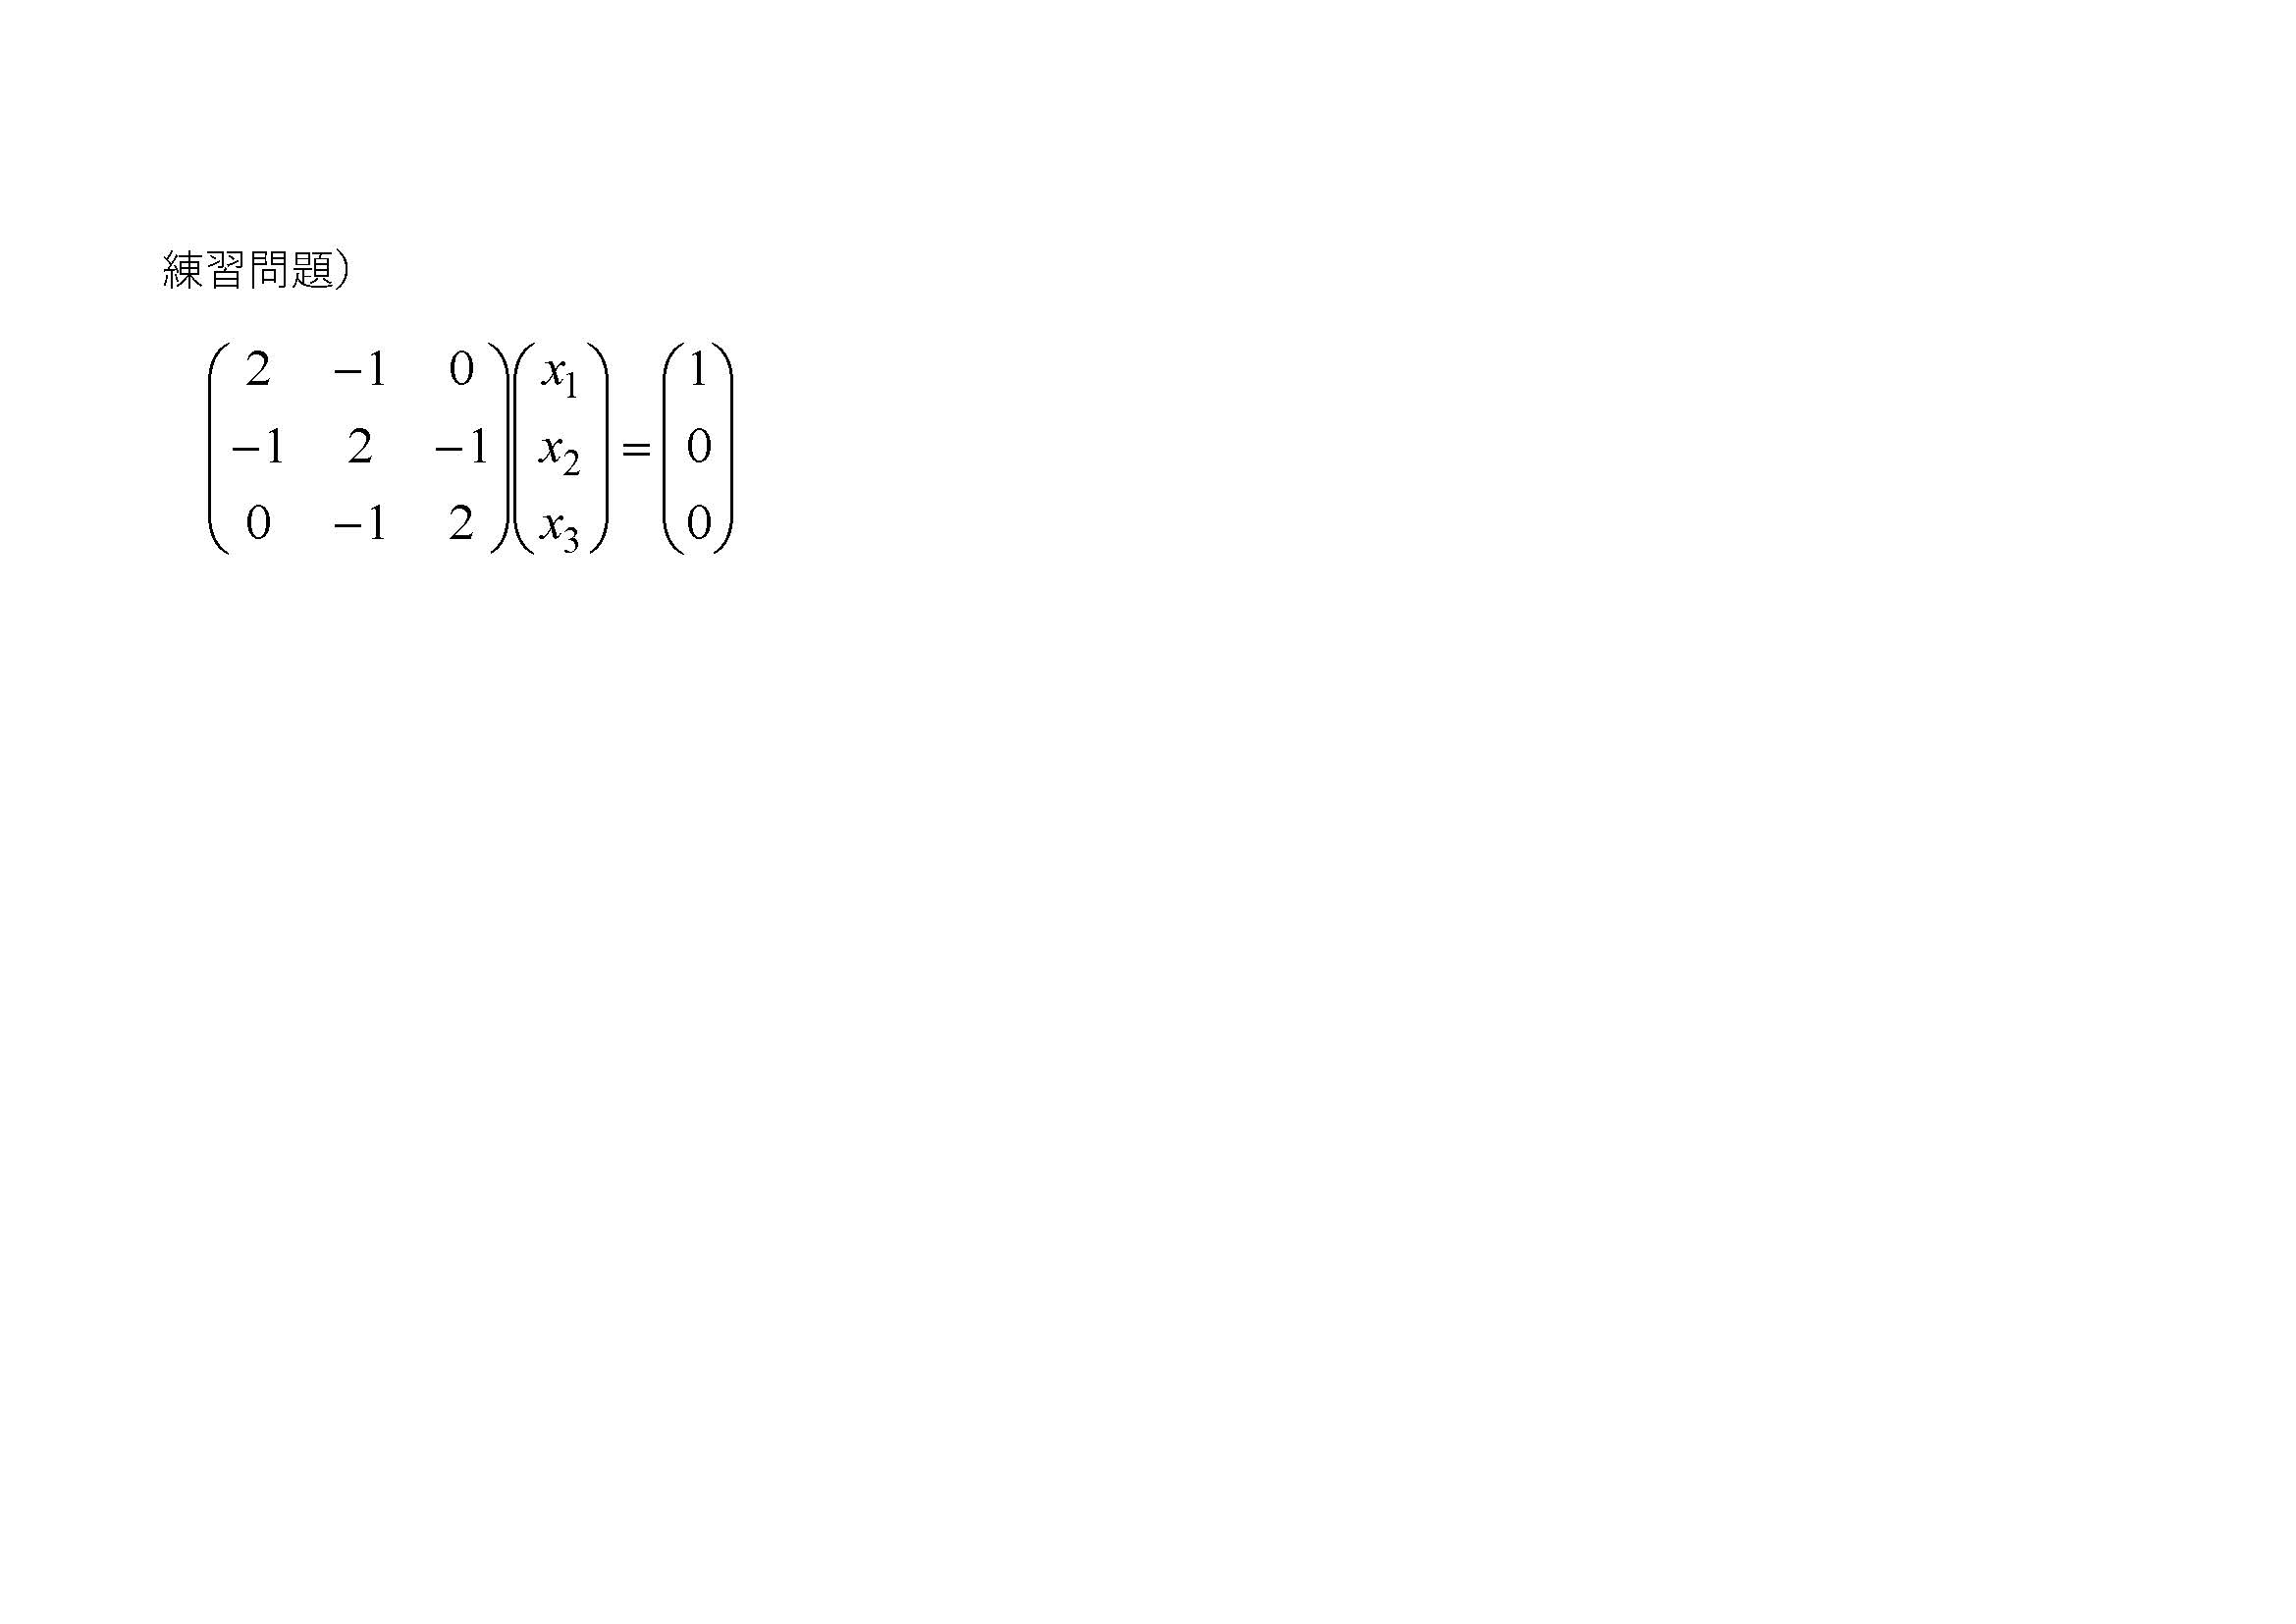

### まずは手で解いてみましょう

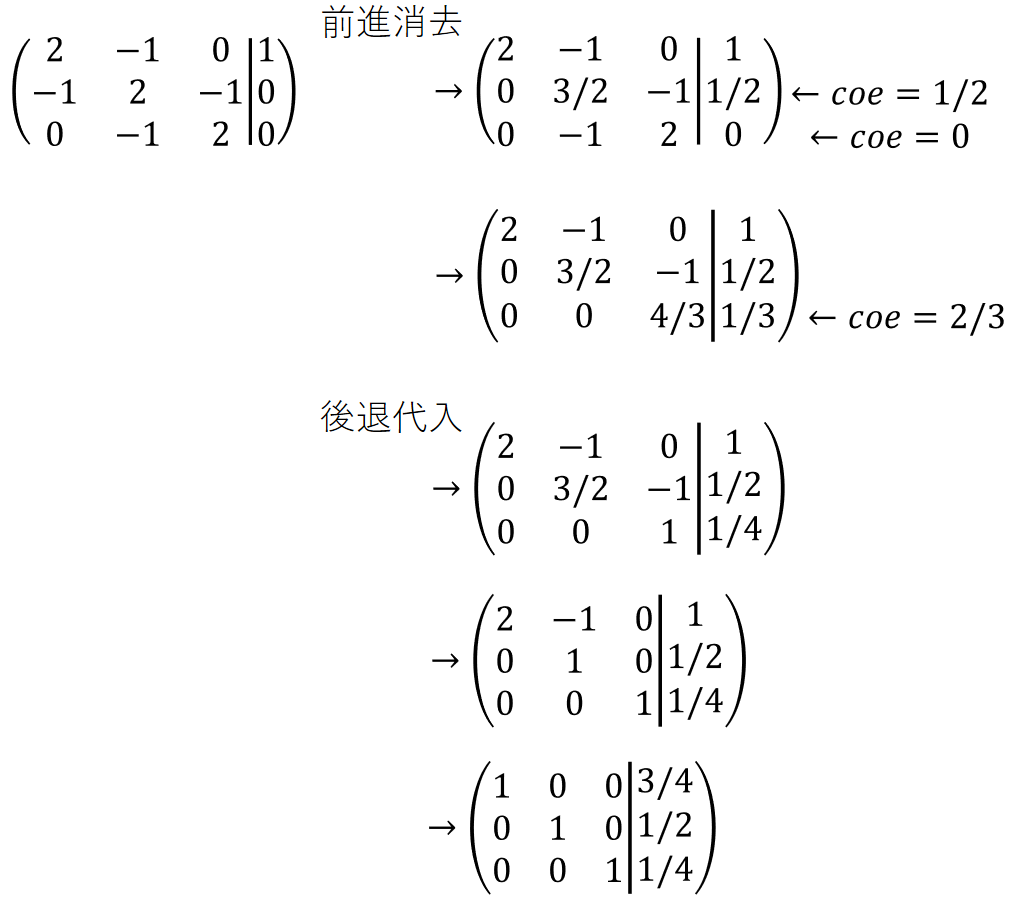

### 実装

行列・配列の初期化

In [ ]:
# Numpy を使うので，Numpy のライブラリーをインポート
import numpy as np

# 配列の初期化
n = 3
A = np.array([[2.0,-1.0,0.0],[-1.0,2.0,-1.0],[0.0,-1.0,2.0]])
b = np.array([1.0,0.0,0.0])
x = np.zeros(n) # すべての成分がゼロのサイズ3のベクトル

Aorg = np.copy(A) # 検算用にマトリクスをコピー
borg = np.copy(b) # 検算用にベクトルをコピー

print("求解対象")
print("A: ",A)
print("b: ",b)

### 上記A,bを入力に、ガウスの消去法でxを求めてください

まずは前進消去から

後退代入と結果出力

検算(A x - b = 0 になっていることを確認する)

### 回答例

前進消去

In [ ]:
for j in range(0,n,1):
  for i in range(j+1,n,1):
    coe = -A[i][j]/A[j][j]
    for k in range(j,n,1):
      A[i][k]+=coe*A[j][k]
    b[i]+=coe*b[j]
  
print("前進消去後")
print("A: ",A)
print("b: ",b)

後退代入と結果出力

In [ ]:
# 後退代入
for j in range(n-1,-1,-1):
  btmp=b[j]
  for i in range(n-1,j,-1):
    btmp-=A[j][i]*x[i]
  x[j]=btmp/A[j][j]

# 計算結果の出力
print("解")
print("x: ",x)

検算(A x - b = 0 になっていることを確認する)

In [ ]:
# 計算結果の検算
print("検算結果")
for i in range(n):
  btmp=0.0
  for j in range(n):
    btmp+=Aorg[i][j]*x[j]
  print("i,err",i,btmp-borg[i])

##   ガウスの消去法（ピボットなし）の実装（関数版）

以下を編集し、n,A,b (ここで、nは自由度数、Aはn×n行列、Bは長さnのベクトル）を入力に解xを出力する関数を作ってください

In [ ]:
def gausselimination(n,A,b):
    x = np.zeros(n)
    # ここを編集
    return x

また、以下を編集し検算をするための関数を作ってください

In [ ]:
def checksolution(n,A,b,x):
  for i in range(n):
    print("i,err",i,b[i])

作成した関数を使って答えを求めてみてください(n=2の場合)

In [ ]:
A2 = np.array([[2.0,1.0],[1.0,0.0]])
b2 = np.array([3.0,-3.0])
x2 = gausselimination(2,A2,b2)

checksolution(2,A2,b2,x2)
print("A: ",A2)
print("b: ",b2)
print("x: ",x2)

作成した関数を使って答えを求めてみてください(n=3の場合)

In [ ]:
A3 = np.array([[2.0,-1.0,0.0],[-1.0,2.0,-1.0],[0.0,-1.0,2.0]])
b3 = np.array([1.0,0.0,0.0])
x3 = gausselimination(3,A3,b3)

checksolution(3,A3,b3,x3)
print("A: ",A3)
print("b: ",b3)
print("x: ",x3)

### 回答例

ガウスの消去法の関数

In [ ]:
def gausselimination(n,Aorg,borg):
  A = np.copy(Aorg)
  b = np.copy(borg)
  x = np.zeros(n)

  # 前進消去
  for j in range(0,n,1):
    for i in range(j+1,n,1):
      coe = -A[i][j]/A[j][j]
      for k in range(j,n,1):
        A[i][k]+=coe*A[j][k]
      b[i]+=coe*b[j]

  # 後退代入
  for j in range(n-1,-1,-1):
    btmp=b[j]
    for i in range(n-1,j,-1):
      btmp-=A[j][i]*x[i]
    x[j]=btmp/A[j][j]

  # 結果の出力
  return x

検算の関数

In [ ]:
def checksolution(n,A,b,x):
  for i in range(n):
    btmp=0.0
    for j in range(n):
      btmp+=A[i][j]*x[j]
    print("i,err",i,btmp-b[i])

計算結果(n=2の場合)

In [ ]:
A2 = np.array([[2.0,1.0],[1.0,0.0]])
b2 = np.array([3.0,-3.0])
x2 = gausselimination(2,A2,b2)

checksolution(2,A2,b2,x2)
print("A: ",A2)
print("b: ",b2)
print("x: ",x2)

計算結果(n=3の場合)

In [ ]:
A3 = np.array([[2.0,-1.0,0.0],[-1.0,2.0,-1.0],[0.0,-1.0,2.0]])
b3 = np.array([1.0,0.0,0.0])
x3 = gausselimination(3,A3,b3)

checksolution(3,A3,b3,x3)
print("A: ",A3)
print("b: ",b3)
print("x: ",x3)

## ガウスの消去法（ピボットあり）の実装に向けて

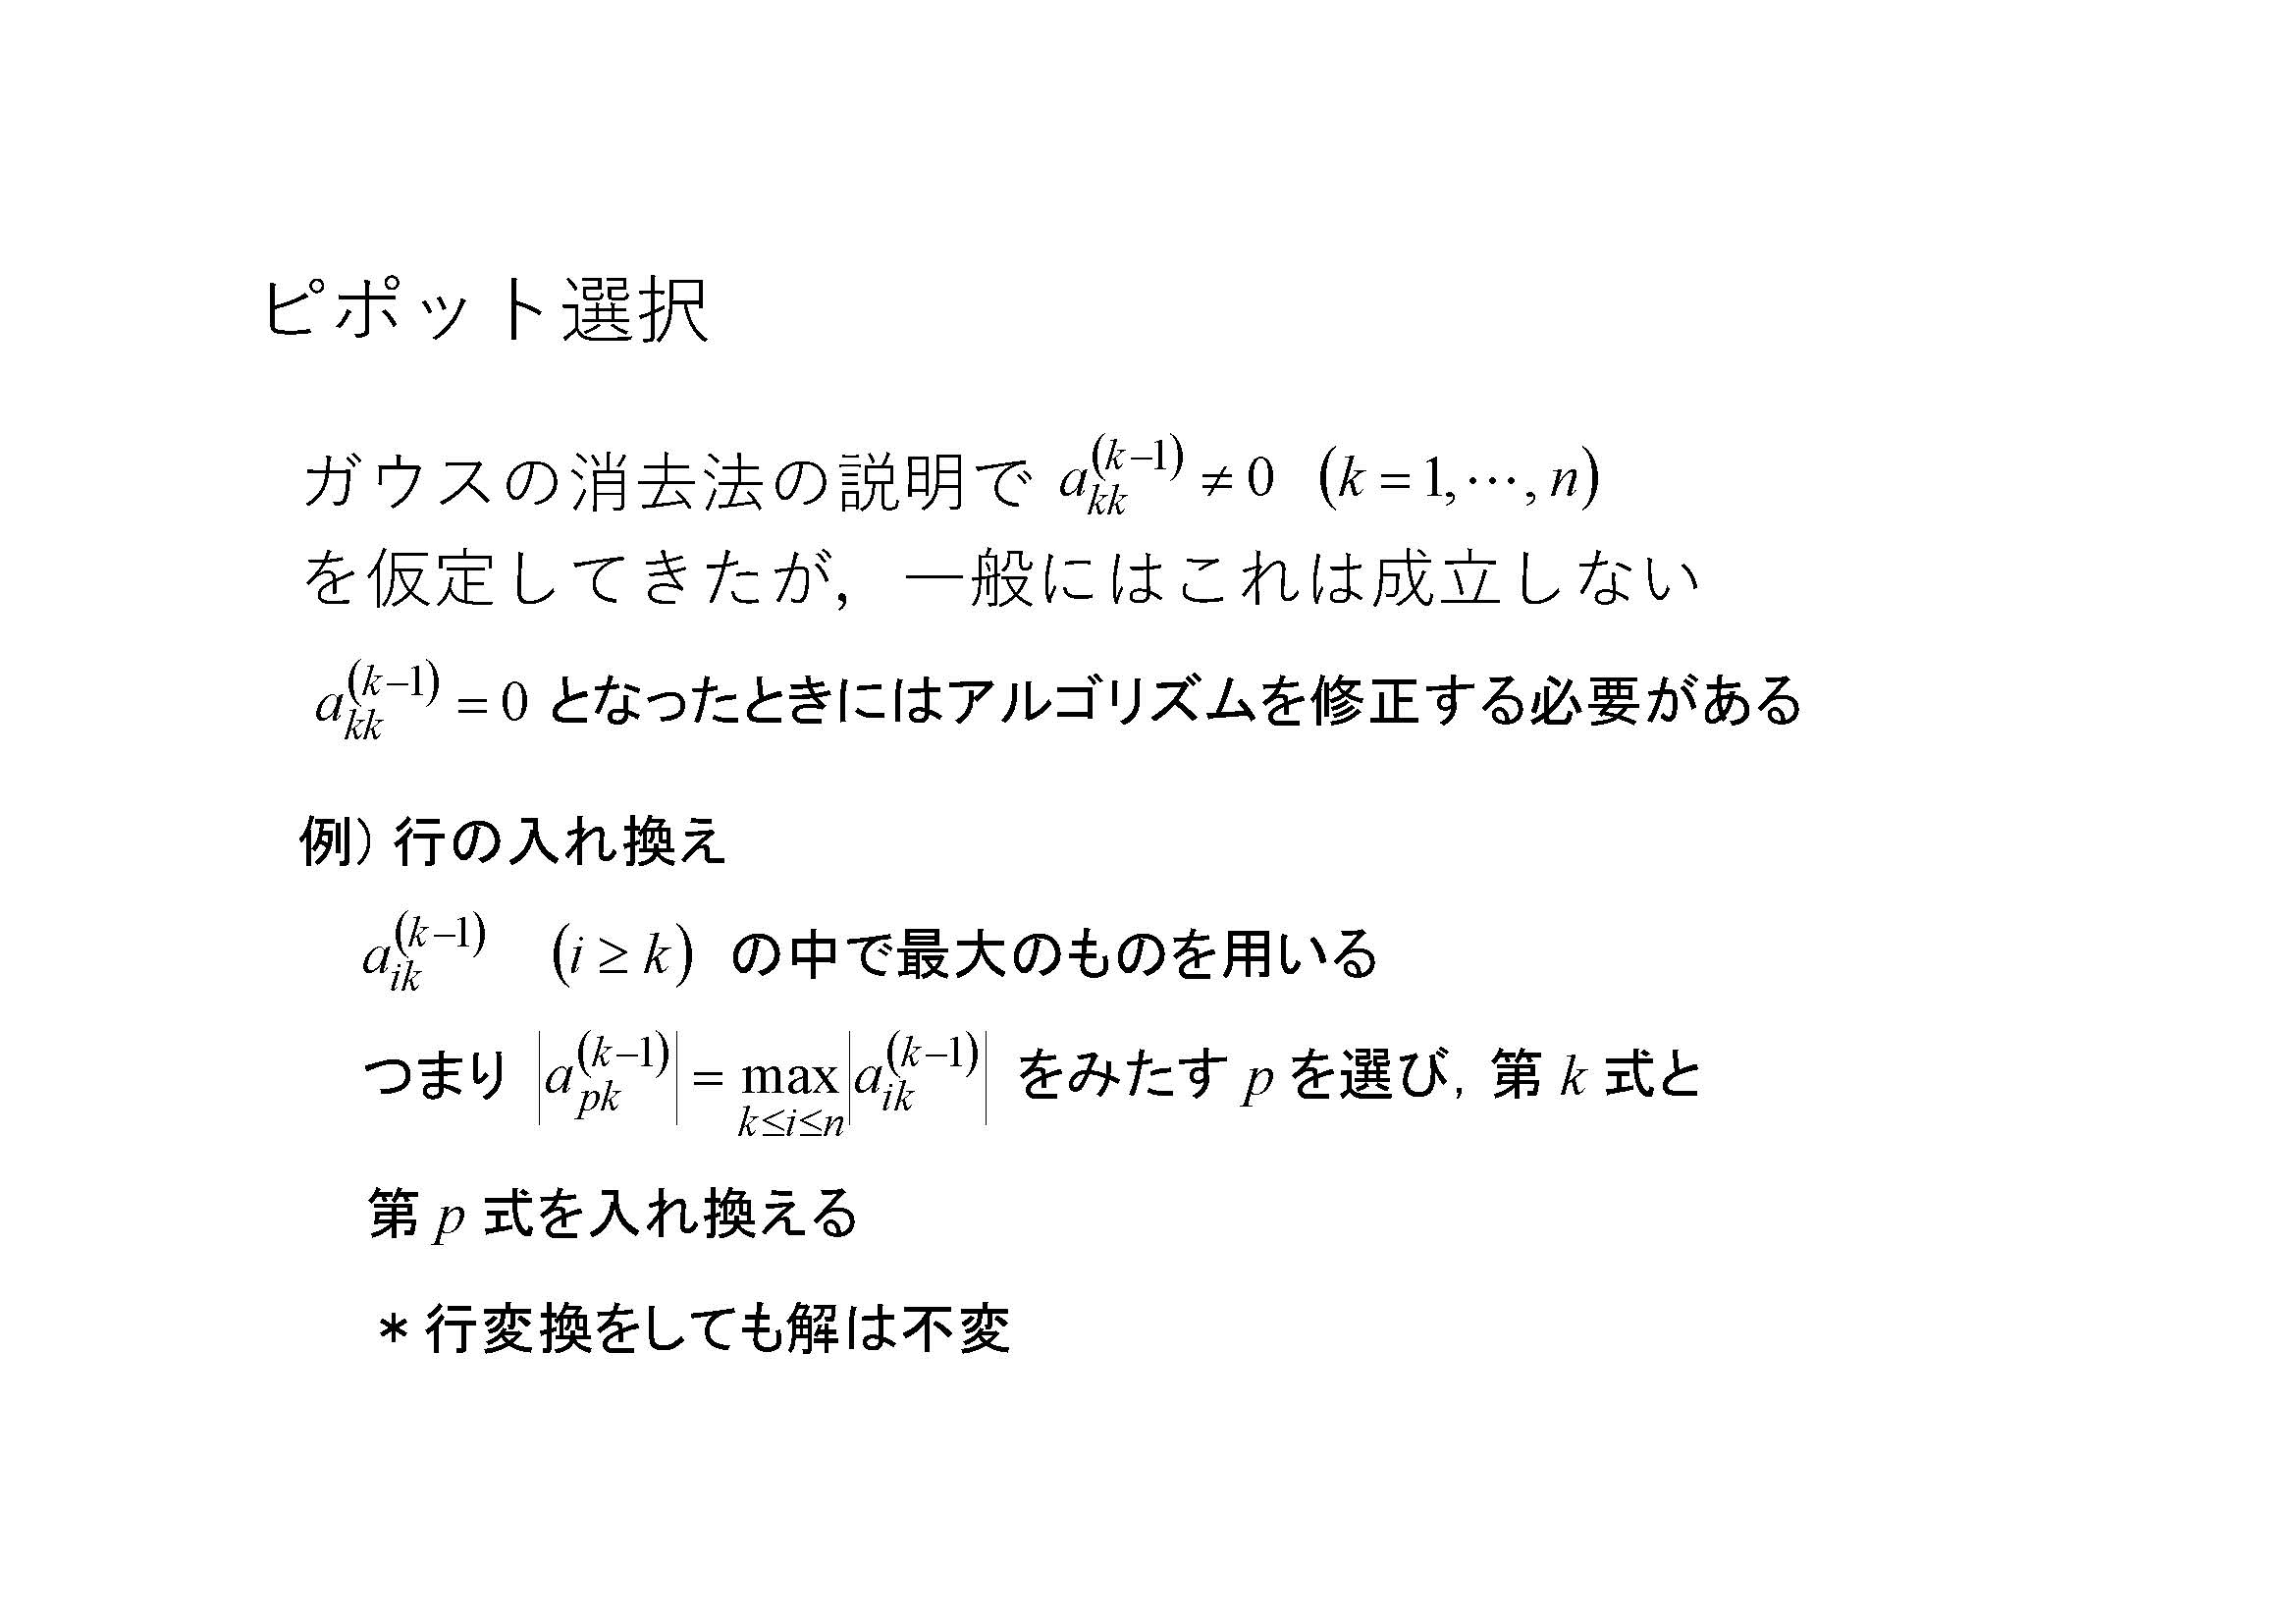

以下を編集してピボットありのガウスの消去法を実装してください。

これは12/27に出題するレポート1の一部となります。
*   提出締切は1/9 (12/26の2週間後)となります。
*   レポート1の詳細は12/26にアナウンスします。

In [ ]:
def gausselimination_withpivot(n,A,b):
    x = np.zeros(n)
    # ここを編集
    return x